In [8]:
import glob
import shutil
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [9]:
book_list1 = glob.glob("*book1*")
book_list2 = glob.glob("*book2*")
i1 = len(book_list1) - 1
i2 = len(book_list2) - 1

In [10]:
%run book1.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965 entries, 0 to 1964
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              1965 non-null   int64 
 1   Gender                  1965 non-null   object
 2   Age                     1965 non-null   int64 
 3   Annual Income ($)       1965 non-null   int64 
 4   Spending Score (1-100)  1965 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         1965 non-null   int64 
 7   Family Size             1965 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 122.9+ KB


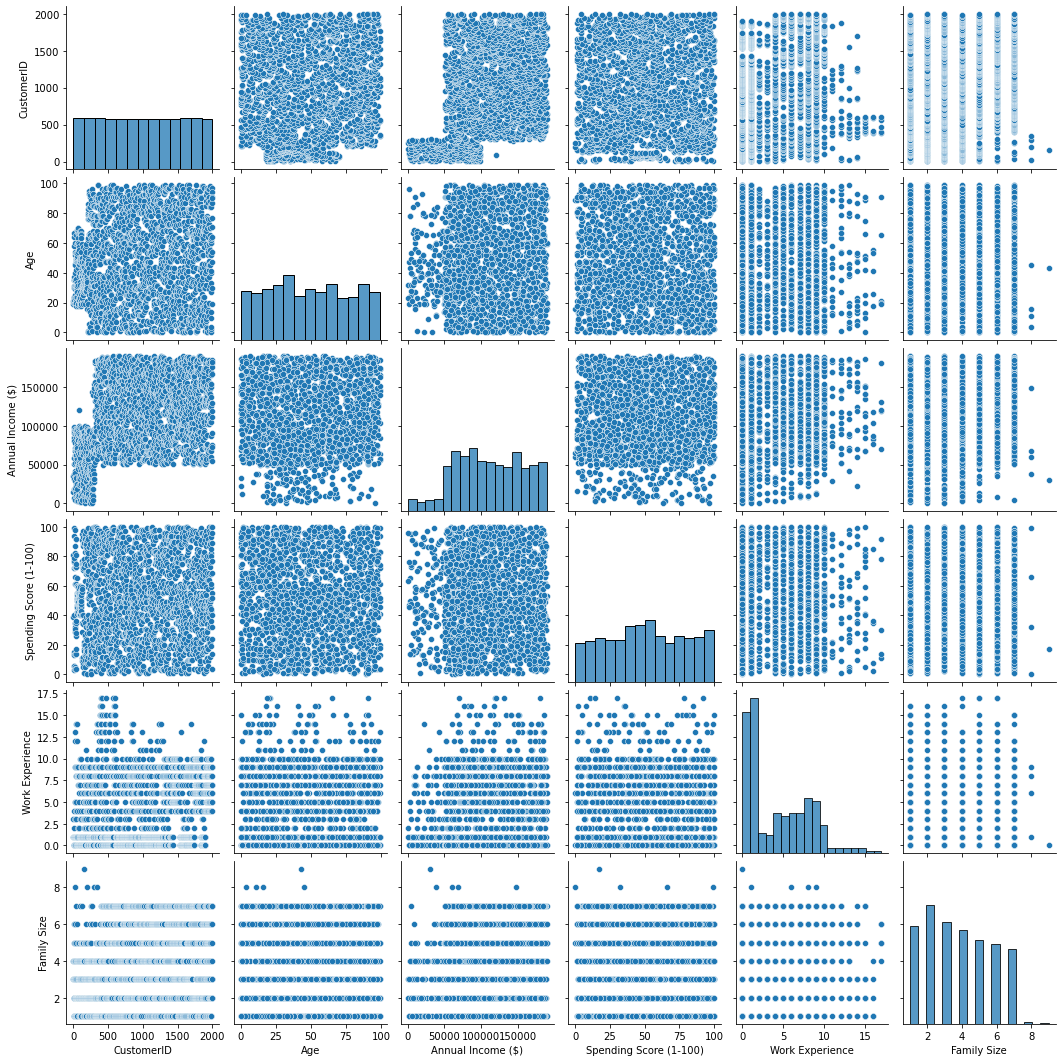

In [11]:
%run book2.ipynb

In [12]:
from pca import pca

In [21]:
dataxstring = data.drop(columns = ["Gender", "Profession"])

In [22]:
model = pca(normalize = True, n_components = None)
print("Fit transform results")
results = model.fit_transform(dataxstring)

Fit transform results
[pca] >n_components is set to 5
[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


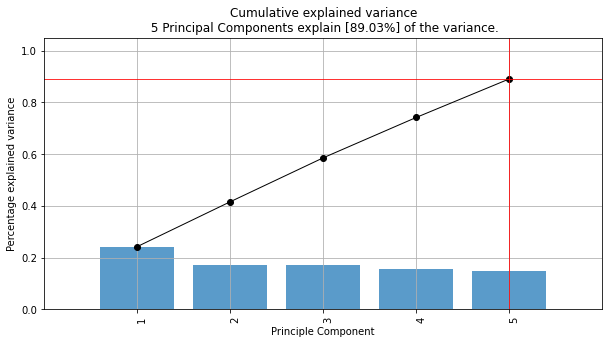

(<Figure size 720x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 5 Principal Components explain [89.03%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 432x288 with 0 Axes>

In [23]:
model.plot(figsize = (10,5))

In [25]:
results_df = pd.DataFrame(model.results["loadings"])
results_df

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
PC1,-0.644410,-0.150308,-0.599814,-0.034050,-0.248236,-0.373612
PC2,0.000819,-0.716109,0.148020,0.648048,0.172545,-0.124658
PC3,-0.038665,-0.258811,0.034791,-0.548574,0.726826,-0.317967
PC4,-0.046159,-0.560186,-0.126191,-0.404993,-0.204050,0.680060
PC5,-0.204121,0.269806,-0.422696,0.337407,0.581147,0.505264


In [27]:
model.results

{'loadings':      CustomerID       Age  Annual Income ($)  Spending Score (1-100)  \
 PC1   -0.644410 -0.150308          -0.599814               -0.034050   
 PC2    0.000819 -0.716109           0.148020                0.648048   
 PC3   -0.038665 -0.258811           0.034791               -0.548574   
 PC4   -0.046159 -0.560186          -0.126191               -0.404993   
 PC5   -0.204121  0.269806          -0.422696                0.337407   
 
      Work Experience  Family Size  
 PC1        -0.248236    -0.373612  
 PC2         0.172545    -0.124658  
 PC3         0.726826    -0.317967  
 PC4        -0.204050     0.680060  
 PC5         0.581147     0.505264  ,
 'PC':            PC1       PC2       PC3       PC4       PC5
 0     2.687534  0.012135 -0.108369  1.352136  0.409597
 1     2.426291  1.150697 -0.403317  0.199848  0.789728
 2     2.360374 -0.358264  1.068267  0.577788 -1.404934
 3     2.483760  1.016614 -0.718886 -0.037571 -0.162527
 4     1.874338 -0.275633 -0.358120  1.

In [28]:
model.results["topfeat"]

,PC,feature,loading,type
0,PC1,CustomerID,-0.644410,best
1,PC2,Age,-0.716109,best
2,PC3,Work Experience,0.726826,best
3,PC4,Family Size,0.680060,best
4,PC5,Work Experience,0.581147,best
5,PC1,Annual Income ($),-0.599814,weak
6,PC2,Spending Score (1-100),0.648048,weak


[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [seismic] can not create [1965] unique colors! Available unique colors: [256].
[colourmap]> Warning: Colormap [seismic] can not create [1965] unique colors! Available unique colors: [256].
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'5 Principal Components explain [89.03%] of the variance'}, xlabel='PC1 (24.2% expl.var)', ylabel='PC2 (17.3% expl.var)'>)

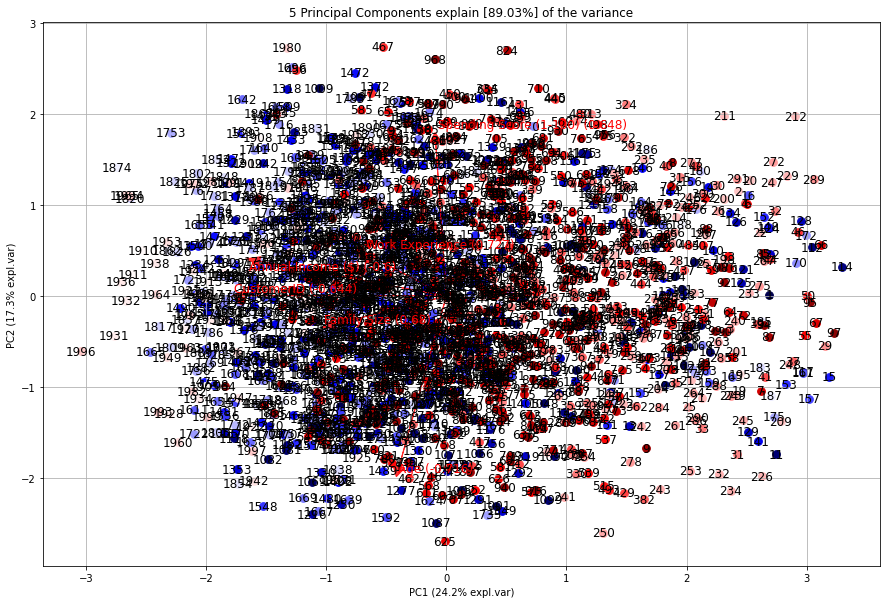

In [31]:
model.biplot(y=dataxstring['CustomerID'].values, legend=False, cmap='seismic')

[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'5 Principal Components explain [89.03%] of the variance'}, xlabel='PC1 (24.2% expl.var)', ylabel='PC2 (17.3% expl.var)'>)

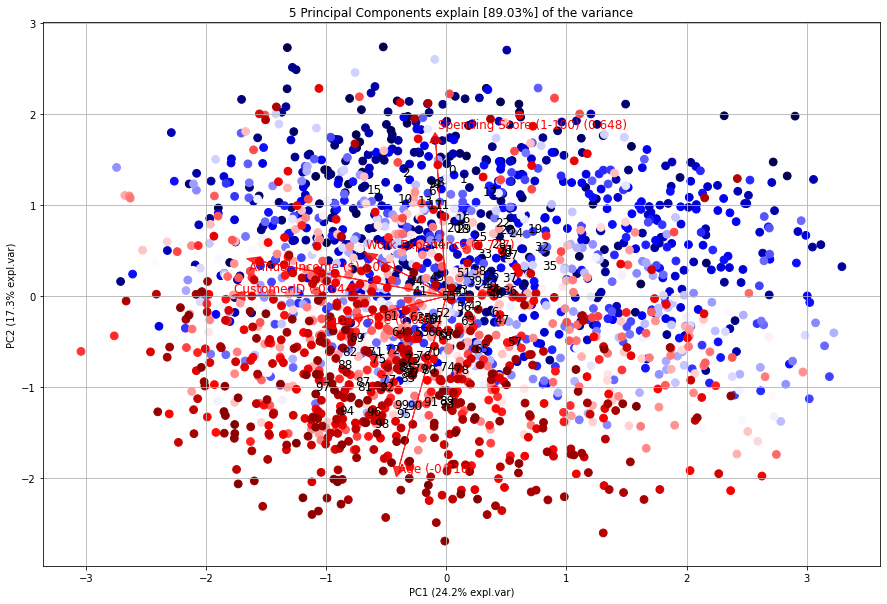

In [32]:
model.biplot(y=dataxstring['Age'].values, legend=False, cmap='seismic')

[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'5 Principal Components explain [89.03%] of the variance'}, xlabel='PC1 (24.2% expl.var)', ylabel='PC2 (17.3% expl.var)'>)

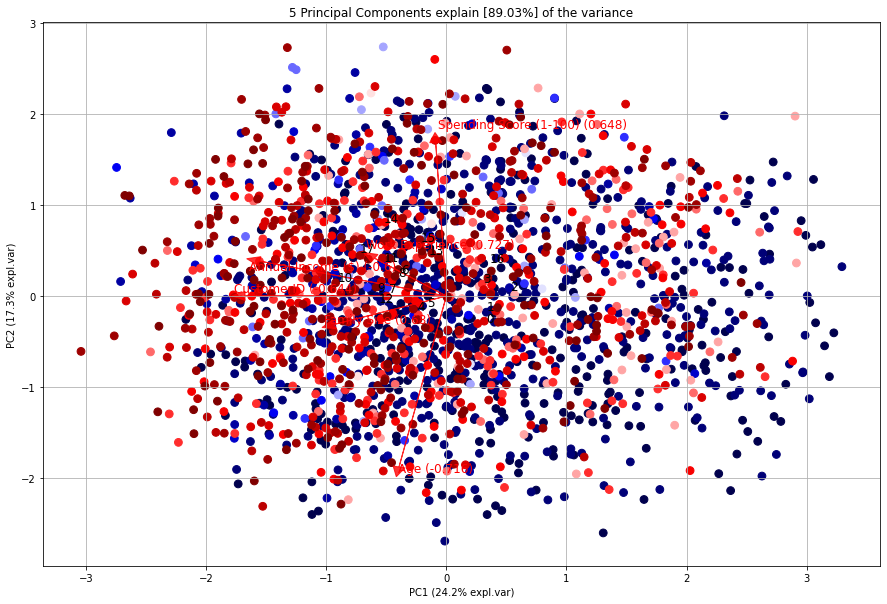

In [33]:
model.biplot(y=dataxstring['Work Experience'].values, legend=False, cmap='seismic')

In [34]:
model = pca(normalize=True, detect_outliers=['ht2', 'spe'])
results = model.fit_transform(dataxstring)

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [6] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[6]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [ ]:
# Plot Hotellings T2
model.biplot(SPE=False, hotellingt2=True, title='Outliers marked using Hotellings T2 method.')
# Get the outliers using SPE/DmodX method.
dataxstring.loc[results['outliers']['y_bool'], :]
print("Hotellings T2 results (y_proba: lower is better)")
print(results['outliers'])

# Plot SPE/DmodX method
model.biplot(SPE=True, hotellingt2=False, title='Outliers marked using SPE/dmodX method.')
# Get the outliers using SPE/DmodX method
dataxstring.loc[results['outliers']['y_bool_spe'], :]
print("SPE/DmodX results (y_score_spe: higher is better)")
print(results['outliers'])

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [1965] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [1965] unique colors! Available unique colors: [9].
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.
Hotellings T2 results (y_proba: lower is better)
       y_proba     p_raw    y_score  y_bool  y_bool_spe  y_score_spe
0     0.848128  0.261379  14.645825   False       False     2.687561
1     0.848128  0.304240  13.944914   False       False     2.685329
2     0.848128  0.145035  17.122827   False       False     2.387408
3     0.848128  0.346511  13.315804   False       False     2.683761
4     0.848128  0.279375  14.342481   False       False     1.894496
...        ...       ...        ...     ...         ...          ...
1960  0.848128  0.216230  15.479993   False       False     3.101574
1961  0.848128  0.131251  17.514377   False       Fa